In [29]:
import pandas as pd
# package used for loading the data, and certain calculations, statistics on the data
import numpy as np
import matplotlib.pyplot as plt
# Visualization package which helps to perform basic data visualization
import seaborn as sns
# Visualization Package which helps in Exploratory Data Analysis
%matplotlib inline
# Importing the pacakges required for performing the Random Tree Classification model 

In [30]:
churn = pd.read_csv('C:/Users/kamalsaran/Desktop/bader/Churn_Modelling.csv', index_col = 0)
# Command used to import the dataset using the pandas package

In [31]:
churn.head()
# To print the top 5 rows of the dataset

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,Exit
2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,Stayed
3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,Exit
4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,Stayed
5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,Stayed


In [32]:
churn = churn.drop(['CustomerId', 'Surname','Geography'], axis =1)
# Dropping the columns which aren't applicable for the random forest classification

C:\Users\kamalsaran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


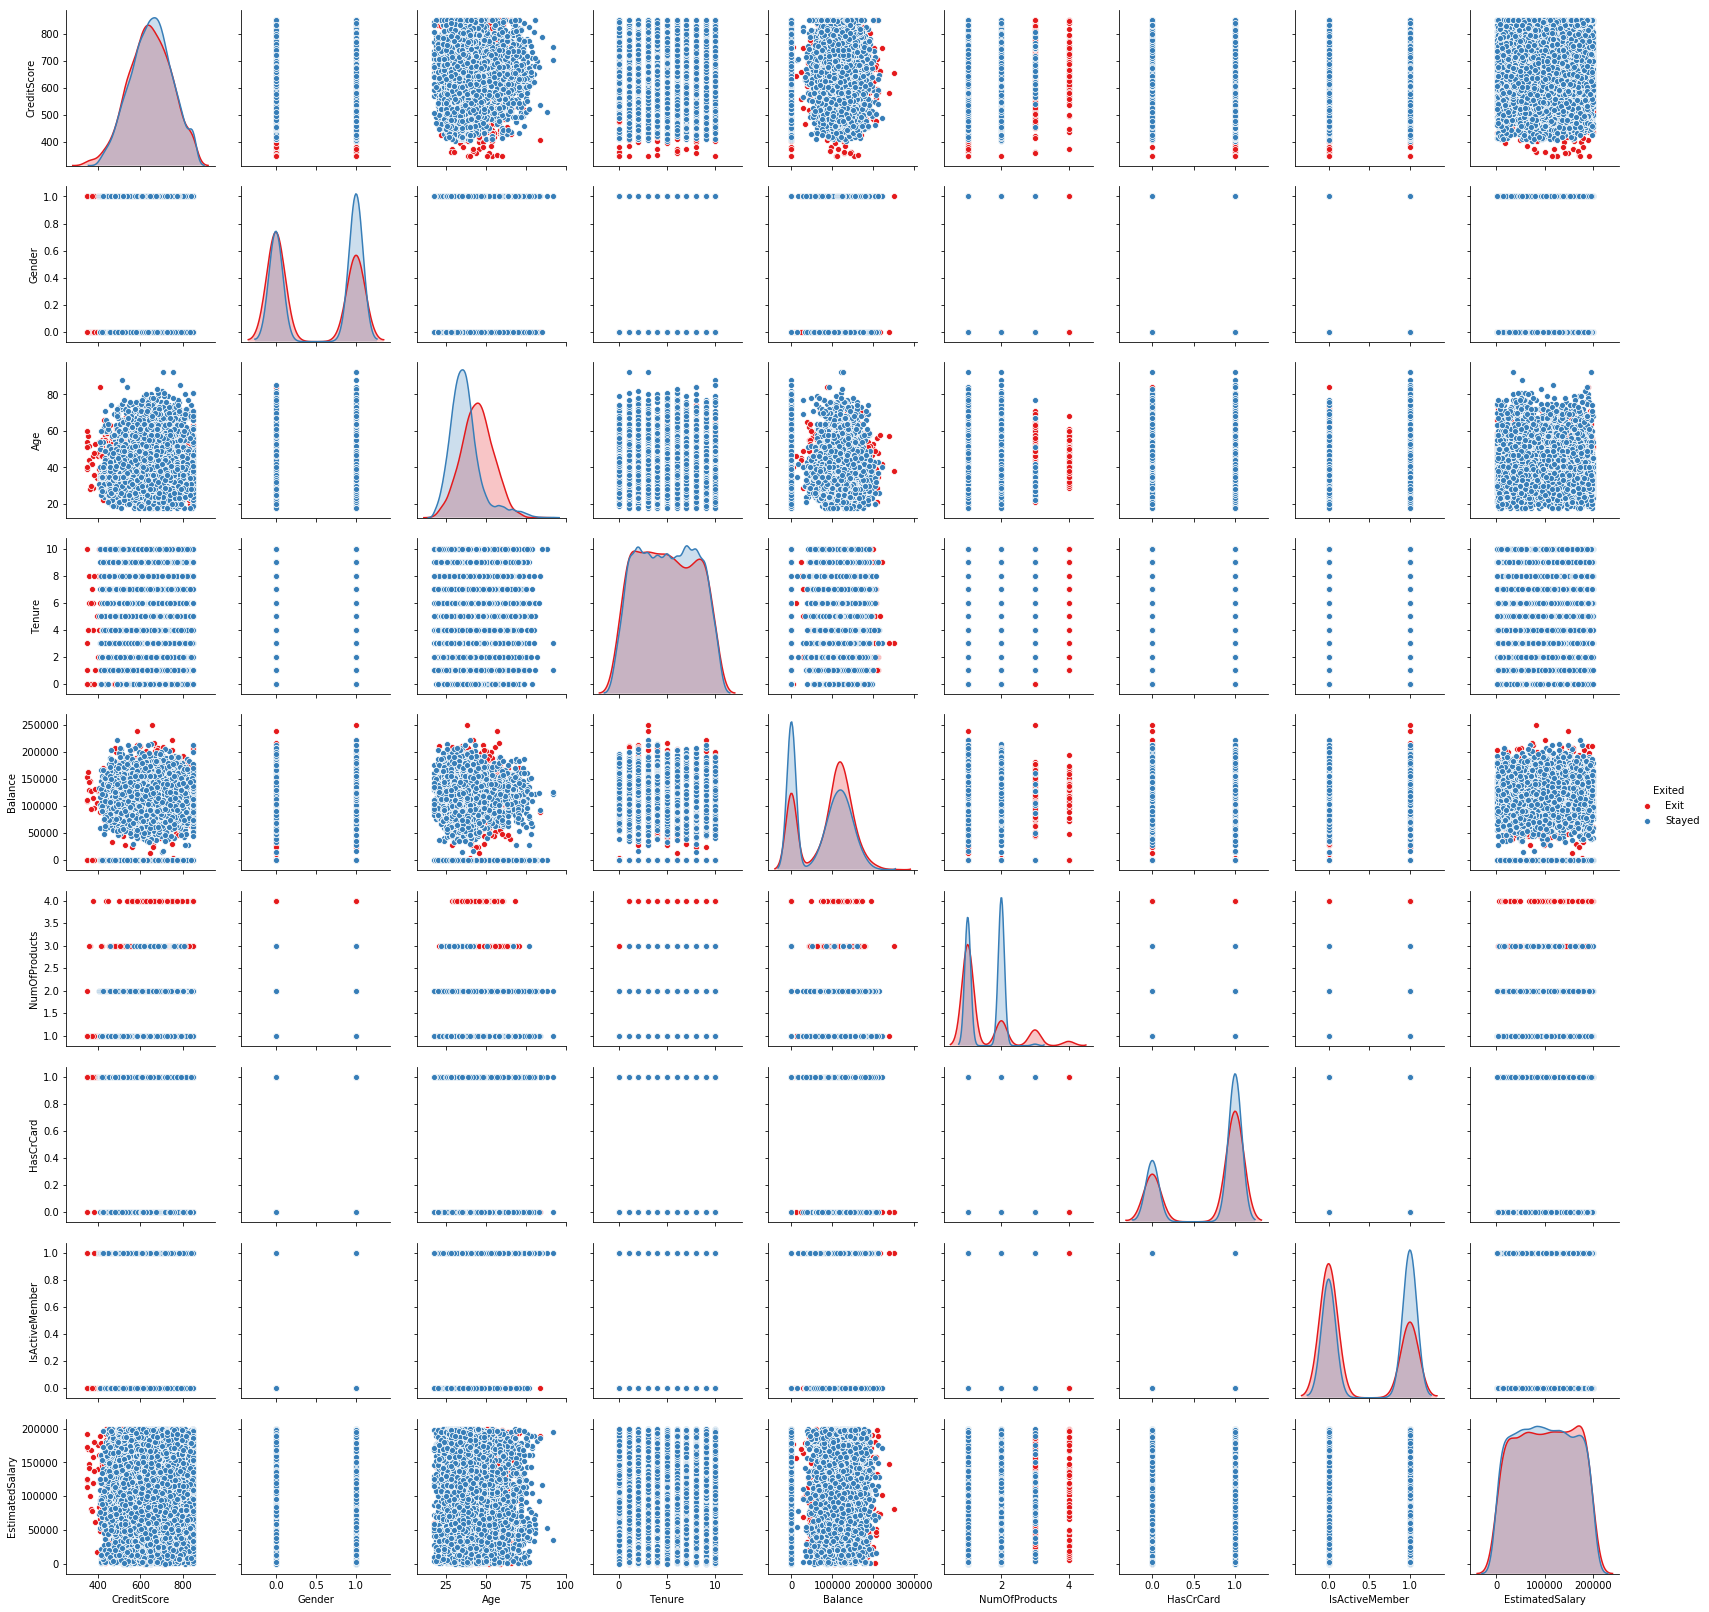

In [34]:
sns.pairplot(churn,hue='Exited',palette='Set1')

In [35]:
from sklearn.model_selection import train_test_split
# Sckit learn package which uses the package to split the train and test dataset

In [36]:
X = churn.drop('Exited',axis=1)
y = churn['Exited']
# Splitting the columns i.e. attributes and labelling the predicting attribute

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
# Initializing the train and test dataset, and allocating the 30% (0.3) to the testing data

In [39]:
from sklearn.ensemble import RandomForestClassifier
# Importing the RandomForestClassifier from the SciKit learn package

In [40]:
rfc = RandomForestClassifier(n_estimators=100)

In [41]:
rfc.fit(X_train, y_train)
# Fitting the training data with RandomForestClassification

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
rfc_pred = rfc.predict(X_test)
# Predicting the label attribute of the testing dataset

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
# Importing Metrics subpackage from the Scikit learn package

In [46]:
print(confusion_matrix(y_test,rfc_pred))
# Prints the Confusion matrix results

[[ 268  353]
 [  87 2292]]


In [47]:
print(classification_report(y_test,rfc_pred))
# Prints the Classification report result

             precision    recall  f1-score   support

       Exit       0.75      0.43      0.55       621
     Stayed       0.87      0.96      0.91      2379

avg / total       0.84      0.85      0.84      3000



In [ ]:
# The result when compared with the Decision Tree classification shows that Random Forests which uses ensemble technquie has proven to have better rate of accuracy when compared to the standard classification technique.